- 데이터 로딩

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


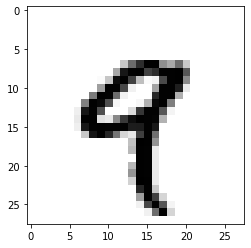

In [5]:
digit = train_images[4]
import matplotlib.pyplot as plt
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.imshow(digit, cmap=plt.cm.binary);

In [15]:
train_images = train_images.astype('float32').reshape(len(train_images), 28*28)/255
test_images = test_images.astype('float32').reshape(len(test_images), 28*28)/255

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [21]:
train_images.shape

(60000, 784)

In [23]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4270 - accuracy: 0.8775
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9667
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9782
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.9943
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9958
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0116 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0089 - accuracy: 0.9976

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9821


In [27]:
test_acc

0.9821000099182129